In [1]:
!pip install undetected-chromedriver

     |████████████████████████████████| 58 kB 259 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.0 MB 5.6 MB/s            
     |████████████████████████████████| 97 kB 6.0 MB/s             
     |████████████████████████████████| 384 kB 6.1 MB/s            
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
     |████████████████████████████████| 58 kB 9.8 MB/s             
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.1.7-py3-none-any.whl size=45441 sha256=2bfdb0b9fed0d881af1c67aa4257991b62963e1a06c343628a997679b40bd93a
  Stored in directory: /Users/imac/Library/Caches/pip/wheels/18/15/c6/11c276bfa7a75cbd09b78e5f68d88eae8b8119e212f4de23b5
Successfully built undetected-chromedriver
You should consider upgr

In [132]:
import undetected_chromedriver as uc
from selenium.webdriver import ActionChains
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium import webdriver
import time

def walmart(url):
    options = webdriver.ChromeOptions() 
    options.headless = True
    driver = uc.Chrome(options=options)

    driver.get(url)
    driver.maximize_window()
    time.sleep(3)

    if "verfication" in driver.title.lower():
        times = 0
        while times < 3:
            try:
                element = driver.find_element(By.ID, 'px-captcha')
                action = ActionChains(driver)
                action.click_and_hold(element)
                action.perform()
                time.sleep(10)
                action.release(element)
                action.perform()
                time.sleep(0.2)
                action.release(element)
                break
            except:
                driver.refresh()
                time.sleep(3)
                pass
            times += 1
    else:
        pass

    from selenium.webdriver.common.by import By
    images = driver.find_elements(By.XPATH, "//div[@data-testid='media-thumbnail']")

    imgs = []
    for image in images:
        src = image.find_element(By.TAG_NAME, "img").get_attribute("src").replace("=80", "=612")
        if "walmartimages" in src:
            imgs.append(src)
    feature_image = imgs[0]

    title = driver.find_element(By.XPATH, "//h1[@itemprop='name']").text
    price = float(driver.find_elements(By.XPATH, "//span[@itemprop='price']")[-1].text.split("$")[-1])
    cleaned = driver.find_element(By.XPATH, "//div[@class='nb3']").text.replace("  See our disclaimer", "").replace("\n", ".").strip()
    raw = driver.find_element(By.XPATH, "//div[@class='nb3']").text.replace("  See our disclaimer", "").strip()
    driver.quit()
    return {
        "title": title,
        "images": imgs,
        "featured_image": feature_image,
        "long_description": cleaned,
        "price": price
    }

In [133]:
walmart("https://www.walmart.com/ip/Graco-4Ever-DLX-4-in-1-Convertible-Car-Seat-Bryant/625703321")

{'title': 'Graco 4Ever DLX 4-in-1 Convertible Car Seat, Bryant',
 'images': ['https://i5.walmartimages.com/asr/de4cdeb7-3db8-40a0-8561-727f91b21108_1.85e91300dbe44dfd5f4cd8b66b032510.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF',
  'https://i5.walmartimages.com/asr/36ff4cdb-4277-4ce2-981e-cd85e72dbeea_1.c0ab22949d93b8faabd003cf960a2bfb.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF',
  'https://i5.walmartimages.com/asr/0c926d7d-7854-46c1-9639-95d746623818_1.add23af7b2e67b7a382f86ecd55d4bc0.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF',
  'https://i5.walmartimages.com/asr/67ae9247-c769-40b7-9f7c-b88feb41a004_1.c4cca80b9d49aeb9c538dc433d629a23.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF',
  'https://i5.walmartimages.com/asr/5eed25fe-9c19-4818-ac44-119ad0f1d0a7_1.68dd00c8ae450ae3b615b8999534c841.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF',
  'https://i5.walmartimages.com/asr/2effb8b5-0128-4cbd-acab-11889e9b2c42_1.99c89b00c73e6263346e7bc3c6f9ab00.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFF

In [2]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp37-abi3-macosx_11_0_arm64.whl (30.0 MB)
  Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl (13.3 MB)


In [6]:
!pip install numpy

In [17]:
from urllib.request import urlopen
import numpy as np
import cv2
import base64

def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)
    _, im_arr = cv2.imencode('.jpg', image)
    im_bytes = im_arr.tobytes()
    im_b64 = base64.b64encode(im_bytes)
    return "data:image/jpeg;base64,"+im_b64.decode("utf-8")

''
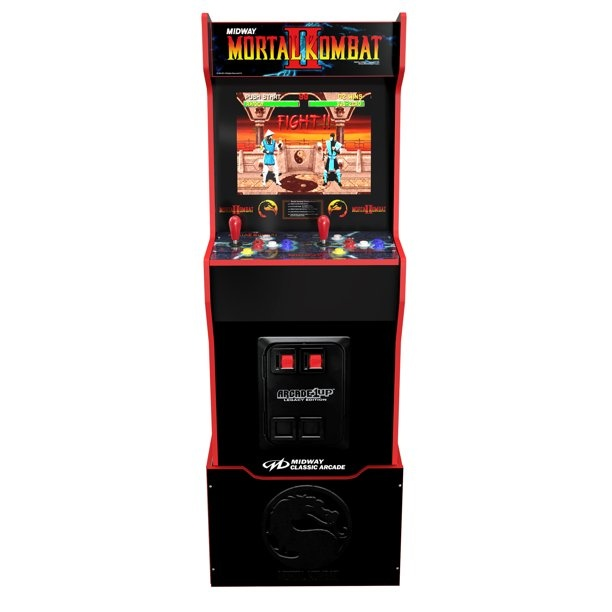

In [18]:
url_to_image("https://i5.walmartimages.com/asr/409f50d5-d280-4749-9b8f-ab377942f135.af6453ae611102b387b1c871de15a3ae.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF")

In [20]:
open("cat.jpeg", "rb").read()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00VExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00>\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00F\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\xff\xed\x00,Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x0f\x1c\x01Z\x00\x03\x1b%G\x1c\x01\x00\x00\x02\x00\x04\x00\xff\xe1\x0c\x81http://ns.adobe.com/xap/1.0/\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\n<x:xmpmeta xmlns:x=\'adobe:ns:meta/\' x:xmptk=\'Image::ExifTool 10.10\'>\n<rdf:RDF xmlns:rdf=\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\'>\n\n <rdf:Description rdf:about=\'\'\n  xmlns:tiff=\'http://ns.adobe.com/tiff/1.0/\'>\n  <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n  <tiff:XResolution>300/1</tiff:XResolution>\n  <tiff:YResolution>300/1</tiff:YResolution>\n </rdf:Description